In [ ]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
from google.cloud import bigquery
from google.cloud import storage

import io
from PIL import Image
from skimage import color
import matplotlib.pyplot as plt


In [53]:
data = np.load('cats_64x64_full.npy')

In [54]:
len(data)

9995

In [ ]:
def rgb_to_lab_batch(X):
    """
    prends un array rgb; ressort un array lab en float 32
    """
    X_lab = color.rgb2lab(X)
    return X_lab

In [55]:
data_lab = rgb_to_lab_batch(data)
data_lab

array([[[[ 3.91018689e+01,  1.27361014e+01,  1.33821968e+01],
         [ 3.99410590e+01,  1.08686178e+01,  1.69735746e+01],
         [ 4.06050223e+01,  1.04243318e+01,  1.42317152e+01],
         ...,
         [ 3.47955595e+01,  1.57299829e+01,  1.10393162e+01],
         [ 3.50341337e+01,  1.49915592e+01,  1.19958062e+01],
         [ 3.60959179e+01,  1.25498087e+01,  1.34448522e+01]],

        [[ 3.65328150e+01,  1.57445874e+01,  1.22780889e+01],
         [ 3.72754160e+01,  1.36787609e+01,  1.45292981e+01],
         [ 3.86549908e+01,  1.08992859e+01,  1.51644777e+01],
         ...,
         [ 3.46189144e+01,  1.50331454e+01,  1.20341879e+01],
         [ 3.25104811e+01,  1.51257135e+01,  1.28399801e+01],
         [ 3.39426980e+01,  1.41892626e+01,  1.16747401e+01]],

        [[ 3.76699322e+01,  1.24933738e+01,  8.81680465e+00],
         [ 3.49625359e+01,  1.33215914e+01,  1.05807398e+01],
         [ 3.42901208e+01,  1.52702363e+01,  1.34709486e+01],
         ...,
         [ 3.33692428e+0

In [56]:
len(data_lab)

9995

In [87]:
def extraire_L_et_original(img_lab):
    """
    img_rgb : image RGB en numpy, shape (H, W, 3), normalisée entre [0,1]
    Retourne :
       L : image (H, W, 1) canal L normalisé sur [0,1] plutôt sur -1 et 1
       original : image RGB identique à l'entrée
    """
    L = img_lab[...,0]
    A_B = img_lab[...,1:]
    return L.astype(np.float64), A_B.astype(np.float64)

In [88]:
L, A_B = extraire_L_et_original(data_lab)

In [89]:
L.shape

(9995, 64, 64)

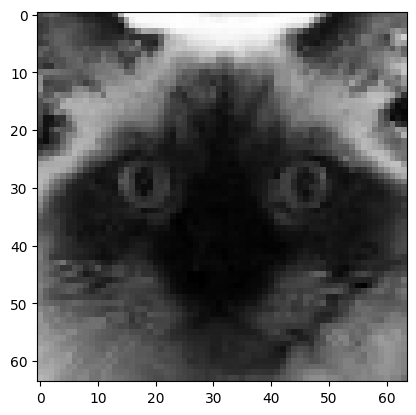

In [92]:
plt.imshow(L[3660], cmap='gray')

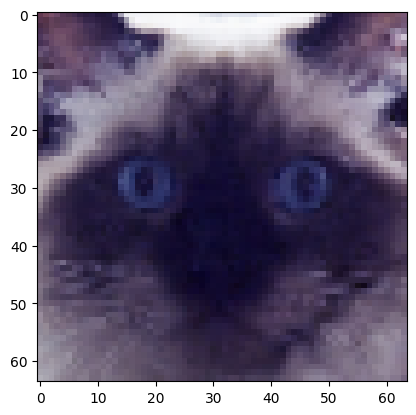

In [93]:
plt.imshow(data[3660])